# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood


### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can used the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X = x$.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


In [3]:
#Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
from IPython.display import display

### Question 1: /10 Marks

The negative log likelihood for a Poisson random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

Here, $\mathbf{y}$ is a vector of counts and $\lambda$ is a scalar value.

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.  The $\sum_{i} \ln(y!)$ does not affect the location of the maximum, and so you can omit the $ \ln(y!)$ in your function.

Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])`.

What happens when you call the function when `lam=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`? 

Answer the following below in markdown: What happens when you set an element of lam to 0 or a negative number and why? 


#### Answer to Question 1

Your answer here.

In [9]:
from scipy.special import gammaln
def poissonNegLogLikelihood(lam,y):
    
    # This implementation is vectorized.
    # Vectorization will come in handy down the road
    neg_log_lik =  -np.sum(y*np.log(lam) - lam)

    return neg_log_lik

lam=1.3
y=np.array([2,1,0,0])
poissonNegLogLikelihood(lam,y)


5.106054387157472

Answer: A lam of zero gives an error - The liklihood of making an observation when lam = 0 should be zero and the log likelihood -inf. 

### Question 2: /15 Marks

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$.

Hint: You can use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [3]:
def poissonRegressionNegLogLikelihood(b, X, y):
    lam = np.exp(X @ b)
    # lam is technically a vector here, so why can we pass it to poissonNegLogLikelihood
    # when that function was intended to take a scalar?
    # The answer is vectorization.  So long as lam and y have the same shape, everything should work as expected
    neg_log_lik = poissonNegLogLikelihood(lam, y)
    return neg_log_lik

b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])
poissonRegressionNegLogLikelihood(b, X, y)

3211.7843052468816

### Question 3: /10 Marks

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?

Answer parts a) and b) below in this cell.  Write no more than 2 sentences per answer! 

---


a) The expoential is applied so as to constrain lambda to be positive

b) Using a linear function in place of lamba might allow for negative lambda


### Question 4: /5 Marks

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [4]:
def modelPrediction(b,X):
    yhat = np.exp(X @ b)
    return yhat


### Question 5: /15 Marks

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b? 

In [5]:
def fitModel(X,y):
    # Need to give the optimizer a guess of where to start
    # Zeros sound good to me
    beta_start = np.zeros(X.shape[1])
    # When we call the optimizer this time around, we set jac=False (the default) since our objective function
    # does not return gradients.  The optimizer will numerically approximate the gradients if we set jac=False
    # which can sometimes (but rarely) come back to bite us.
    # Luckily, the likelihood is well behaved (or as we say in stats, "satisfies mild regularity conditions")
    # and so letting the optimizer compute the gradient is just fine.
    mle = minimize(poissonRegressionNegLogLikelihood, beta_start, args=(X,y))
    # The optimizer stores the coefficients under the .x method
    # So call mle.x to get the coefficients
    betas = mle.x
    return betas

X = np.array([[1,2,3],[2,3,1]]).T
y = np.array([0,2,10])
fitModel(X,y)

array([ 0.94827554, -0.52953516])

### Question 6: /20 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

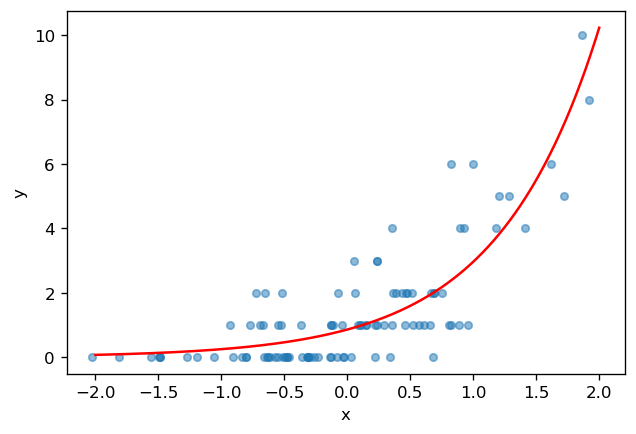

In [6]:
# Loading in the data.  This is pretty standard
df = pd.read_csv('poisson_regression_data.csv')

fig, ax = plt.subplots(dpi = 120)
# Scatter the data.  Pretty standard
df.plot.scatter('x','y', ax = ax, alpha = 0.5)

# Fit the model.  You can use your functions.  First step is to construct the design matrix X
x = df.x.values 
# Add intercept
X = np.c_[np.ones(x.size), x]

# Now, we can find the betas by calling fitModel.  fitModel should optimize the poissonRegressionNegLogLikelihood
y= df.y.values
betas = fitModel(X,y)

# We need to predict on data from -2 to 2.
# We need to first create an array of linearly spaced points between -2 and 2
# Then, we need to turn that into a design matrix
newx = np.linspace(-2,2,1001)
# Add intercept
newX = np.c_[np.ones(newx.size), newx]

# We can use the betas we found above to make new predictions
# Here is where we use modelPrediction
y_predicted = modelPrediction(betas,newX)

#Finally, plot the predictions on the same axis and color the predictions red
ax.plot(newx,y_predicted,color = 'red')

### Question 7:  /20 Marks

Now apply linear regression (ordinary least squares) to the data, obtain parameter estimates and and plot the predictions over the same range.


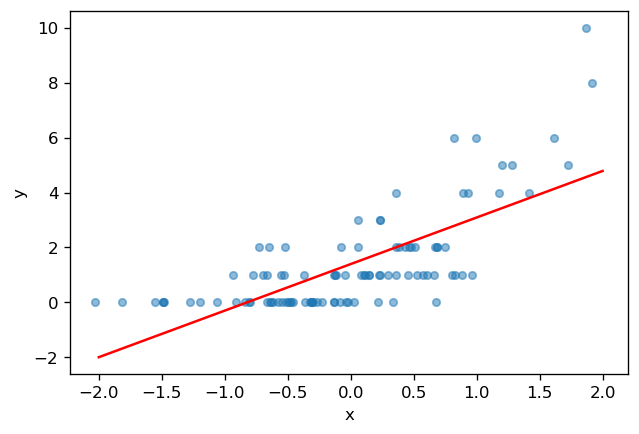

In [4]:
# This should be straight forward from the previous assignment.

df = pd.read_csv('poisson_regression_data.csv')
# Get X data
x = df.x.values 
# Add intercept to make design matrix
X = np.c_[np.ones(x.size), x]
# Get y data
y= df.y.values

fig, ax = plt.subplots(dpi = 120)
# Scatter the data.  Pretty standard
df.plot.scatter('x','y', ax = ax, alpha = 0.5)

# Construct the linear model
ols_fit = linear_model.LinearRegression().fit(X, y)

# We need to predict on data from -2 to 2.
# We need to first create an array of linearly spaced points between -2 and 2
# Then, we need to turn that into a design matrix
newx = np.linspace(-2,2,1001)
# Add intercept
newX = np.c_[np.ones(newx.size), newx]

# Remember, you need to show your model the same sort of data it learned from
# So must pass in a data frame with column of 1s and column of xs
# predict on the new data
y_predicted_ols = ols_fit.predict(newX)
ax.plot(newx,y_predicted_ols,color = 'red')

### Question 8: /5 Mark(s)

Do you see any major problems with the predictions from linear regression? Keep in mind that this model is intended to model counts of things.  Provide your answer below in markdown in fewer than 5 sentences. 

#### Answer

The model predicts negative counts, which is impossible!

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.